# BTS x UNICEF “Love Myself” Campaign: same message, different interpretation from K-pop fandoms
# < Companion Notebook >

Berbiguier Mathieu <br>
Ph. D. Student, University of California at Los Angeles (UCLA)

<i>This Jupyter Notebook provides greater details concerning the result of the text analysis of the corpora used in the paper "BTS X Unicef "Love Myself" Campaign: same message, different interpretation from K-pop fandoms." It not only provides the code that lead to the results exploited in the paper, but it also provides wider results and methods to explore them further.</i>

### 3. Methodology

In [3]:
#Loading the Necessary Libraries

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.collocations import *

from konlpy.tag import Okt 
okt = Okt()

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

%matplotlib inline

#### Fig. 1a - Introducing the first data set, "Reactions from the International Fandom"

In [4]:
# Load in the dataframe
df_en = pd.read_csv("output_got_BTS+UN+Speech(EN).csv", sep=';', encoding = "ISO-8859-1")
# Looking at first 5 rows of the dataset
df_en.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,26/11/2019 23:08,InvictusBangtan,baepsayed,1,0,4,My pleasure! I was never into Kpop until I saw...,NaN,NaN,NaN,"1,19946E+18",https://twitter.com/InvictusBangtan/status/119...
1,26/11/2019 21:44,leopnxh,NaN,0,0,0,writing my presentation about the globalisatio...,NaN,NaN,NaN,"1,19944E+18",https://twitter.com/leopnxh/status/11994438224...
2,26/11/2019 19:34,MsScorpion555,Bangtan_Egypt,0,0,3,Egyptian schools teaching the new generations ...,NaN,@BTS_twt @_GenUnlimitedhttps,#Loveyourself,"1,19941E+18",https://twitter.com/MsScorpion555/status/11994...
3,26/11/2019 18:40,_faraahahmeed,NaN,1,0,3,A school made a seminar about bullying and gue...,NaN,@BTS_twt,#BTSLoveMyself #ENDviolencepic,"1,1994E+18",https://twitter.com/_faraahahmeed/status/11993...
4,26/11/2019 17:43,MlNCOSMOS,gyuarm,0,1,6,"Yes we stan bts, Princes of pop, academy membe...",NaN,NaN,#1,"1,19938E+18",https://twitter.com/MlNCOSMOS/status/119938322...


#### Fig. 1b - Introducing the second data set, "Reactions from the Korean Fandom"

In [4]:
# Load in the dataframe
df_kr = pd.read_csv("output_got_방탄+유엔+연설.csv", encoding = "UTF-8")
# Looking at first 5 rows of the dataset
df_kr.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2019-11-23 15:13:09,uno0917_,URMHB,0,0,0,ㅃㄹ방탄유엔연설해 https://twitter.com/URMHB/status/119...,NaN,NaN,NaN,1198258190435045376,https://twitter.com/uno0917_/status/1198258190...
1,2019-11-22 15:09:24,Eunbin_V,ROHA_0613,1,0,1,시험범의에 방탄 유엔 연설 들어가서 행복하네요^^,NaN,NaN,NaN,1197894858003734534,https://twitter.com/Eunbin_V/status/1197894858...
2,2019-11-22 15:08:07,Eunbin_V,NaN,6,0,21,여러분들 오랜만이네요 중학교 마지막 영어 시험 범위에 방탄 유엔 연설이 들어가서ㅠㅠ...,NaN,NaN,NaN,1197894536447414272,https://twitter.com/Eunbin_V/status/1197894536...
3,2019-11-20 14:32:58,artistbts130613,TunaTastyShrimp,1,0,2,그래미 후보발표 보는것도 첨 유엔연설도 실시간으로 보는것도 첨. 신세계 경험이네요 ...,NaN,NaN,NaN,1197160913989595136,https://twitter.com/artistbts130613/status/119...
4,2019-11-20 13:36:07,moinoi9999,NaN,0,0,1,맞다맞다 새벽에 엄청 떨리면서 유엔연설 봣던거생각난다 방탄덕분에 김용 총재님 연설두...,NaN,NaN,NaN,1197146604475543553,https://twitter.com/moinoi9999/status/11971466...


#### Fig. 1c - Elaborating corpora with only the content of the tweets

In [6]:
tweets_en = " ".join([str(tweet) for tweet in df_en.text])
print ("There are {} words in the combination of all tweets in English.".format(len(tweets_en)))

There are 2852817 words in the combination of all tweets in English.


In [5]:
tweets_kr = " ".join([str(tweet) for tweet in df_kr.text])
print ("There are {} words in the combination of all tweets in Korean.".format(len(tweets_kr)))

There are 272717 words in the combination of all tweets in Korean.


#### Fig. 1d - Tokenizing the corpora and cleaning them by removing stopwords, punctuation and numbers. (International Fans corpus)

In [8]:
stop_words_en = stopwords.words('english')
stop_words_en.extend(['pic', 'gon', 'na', 'wan', 'na', 'com', 'http', 'https', 'bts', 'un', 'speech', 'twitter', 'rm', 'RM', 'namjoon', 'kim', 'BTS_twt', 'general', 'assembly'])

tokens_en = word_tokenize(tweets_en)
#Make all words lowercase
tokens_en_lower = [w.lower() for w in tokens_en]
#Remove stopwords, punctuation, and numbers.
content_en = [w for w in tokens_en_lower if w not in stop_words_en and w.isalpha()]
#Number of words in the "clean" corpus
print("Number of words in the tweet corpus: ", len(content_en))

Number of words in the tweet corpus:  196094


#### Fig. 1e - Tokenizing the corpora and cleaning them by removing stopwords, punctuation and numbers. (Korean Fans corpus)

In [12]:
stop_words_kr = open("stopwords-ko.txt").read()

#Those parameters makes it possible to get the plain form of verbs even when they are conjugated, which is very useful.
tokens_kr = okt.morphs(tweets_kr, norm=True, stem=True)
#Remove stopwords, punctuation, and numbers.
content_kr = [w for w in tokens_kr if w not in stop_words_kr]
#Number of words in the "clean" corpus
print("Number of words in the tweet corpus: ", len(content_kr))

Number of words in the tweet corpus:  38229


### 4. BTS as a tool of expression of Gender Identity

#### Fig. 2 - List of most recurring terms among tweets from the international fandom

In [10]:
#Count the frequency of each word
from collections import Counter
#Word Frequency
counts = Counter(content_en)
#Convert counter object to data frame
word_count = pd.DataFrame.from_dict(counts, orient='index').reset_index()
word_count.rename(columns = {'index' : 'Word',0:'Frequency'},inplace = True)
word_count = word_count.sort_values('Frequency',ascending=False)

word_count['Rank'] = np.arange(1,1+len(word_count.Frequency))
word_count = word_count.reindex(columns=['Rank','Word','Frequency'])
                  
                  
#Number of unique words
print("Number of unique words in the tweets : ", len(word_count))

#Top ten words
word_count.head(20)

Number of unique words in the tweets :  14110


,Rank,Word,Frequency
99,1,love,2175
192,2,like,1742
193,3,one,1187
87,4,really,1147
58,5,year,1094
183,6,people,1085
26,7,proud,1073
93,8,gave,1034
173,9,said,1007
268,10,even,992


In [53]:
#Export results in a CSV file
word_count.to_csv('wordcount_en.csv')

In [11]:
word_count[word_count['Word'] == "gender"]

,Rank,Word,Frequency
414,183,gender,208


#### Fig. 2a - Main collocations of the reactions to the speech (biagrams)

In [18]:
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures

bigram_collocation = BigramCollocationFinder.from_words(content_en) 
bigram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 15)

[('cultural', 'merit'),
 ('various', 'countries'),
 ('gender', 'identity'),
 ('jimmy', 'fallon'),
 ('social', 'artist'),
 ('liked', 'youtube'),
 ('year', 'since'),
 ('hair', 'products'),
 ('curriculum', 'various'),
 ('matter', 'skin'),
 ('youtube', 'video'),
 ('grammy', 'museum'),
 ('school', 'curriculum'),
 ('favorite', 'social'),
 ('last', 'year')]

In [19]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 

trigram_collocation = TrigramCollocationFinder.from_words(content_en)  
trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15)

[('order', 'cultural', 'merit'),
 ('curriculum', 'various', 'countries'),
 ('cultural', 'merit', 'award'),
 ('liked', 'youtube', 'video'),
 ('various', 'countries', 'null'),
 ('cultural', 'merit', 'medal'),
 ('material', 'various', 'countries'),
 ('gender', 'identity', 'speak'),
 ('favorite', 'social', 'artist'),
 ('color', 'gender', 'identity'),
 ('cultural', 'merit', 'medals'),
 ('got', 'cultural', 'merit'),
 ('received', 'cultural', 'merit'),
 ('receiving', 'cultural', 'merit'),
 ('receive', 'cultural', 'merit')]

In [22]:
stop_words_en.extend(['cultural', 'merit'])
content_en = [w for w in tokens_en_lower if w not in stop_words_en and w.isalpha()]

#### Fig. 2b - Main collocations of the reactions to the speech (trigrams)

In [23]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 

trigram_collocation = TrigramCollocationFinder.from_words(content_en)  
trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15)

[('curriculum', 'various', 'countries'),
 ('liked', 'youtube', 'video'),
 ('various', 'countries', 'null'),
 ('material', 'various', 'countries'),
 ('gender', 'identity', 'speak'),
 ('favorite', 'social', 'artist'),
 ('color', 'gender', 'identity'),
 ('various', 'countries', 'via'),
 ('last', 'year', 'since'),
 ('colour', 'gender', 'identity'),
 ('school', 'curriculum', 'various'),
 ('skin', 'color', 'gender'),
 ('part', 'school', 'curriculum'),
 ('various', 'countries', 'soompi'),
 ('race', 'gender', 'identity')]

#### Fig. 3 - Collocations for a specific word, "gender"

In [32]:
#The following code finds bigrams of the keyword, but does not span an interval of words.

bigram_measures = nltk.collocations.BigramAssocMeasures()
kw_filter = lambda *w: 'gender' not in w
finder.apply_ngram_filter(kw_filter)
finder.nbest(bigram_measures.mi_like,15)

[('gender', 'identity'),
 ('skin', 'gender'),
 ('matter', 'gender'),
 ('color', 'gender'),
 ('colour', 'gender'),
 ('gender', 'speak'),
 ('transcends', 'gender'),
 ('race', 'gender'),
 ('conviction', 'gender'),
 ('gender', 'neutral'),
 ('motivational', 'gender'),
 ('gender', 'find'),
 ('gender', 'name'),
 ('gender', 'race'),
 ('age', 'gender')]

### 5. Between Self and National Pride

#### Fig. 8a & 8b - Word Count for Korean Corpus

In [14]:
#Count the frequency of each word
from collections import Counter
#Word Frequency
counts_kr = Counter(content_kr)
#Convert counter object to data frame
word_count_kr = pd.DataFrame.from_dict(counts_kr, orient='index').reset_index()
word_count_kr.rename(columns = {'index' : 'Word',0:'Frequency'},inplace = True)
word_count_kr = word_count_kr.sort_values('Frequency',ascending=False)

word_count_kr['Rank'] = np.arange(1,1+len(word_count_kr.Frequency))
word_count_kr = word_count_kr.reindex(columns=['Rank','Word','Frequency'])
                  
                  
#Number of unique words
print("Number of unique words in the tweets : ", len(word_count_kr))

#Top ten words
word_count_kr.head(25)

Number of unique words in the tweets :  7268


,Rank,Word,Frequency
120,1,내,325
247,2,너무,311
40,3,ㅋㅋㅋ,293
63,4,사랑,283
155,5,아이돌,279
251,6,아미,268
213,7,가다,231
167,8,그렇다,230
44,9,나오다,223
353,10,보라,185


In [138]:
#Export results in a CSV file
word_count_kr.to_csv('wordcount_kr.csv')

In [139]:
word_count_kr[word_count_kr['Word'] == "성"]

,Rank,Word,Frequency
99,371,성,20


In [181]:
word_count_kr[word_count_kr['Word'] == "성별"]

,Rank,Word,Frequency
437,1404,성별,4


In [140]:
word_count_kr[word_count_kr['Word'] == "성정체성"]

,Rank,Word,Frequency
1125,2142,성정체성,3


In [141]:
word_count_kr[word_count_kr['Word'] == "젠더"]

,Rank,Word,Frequency
1799,5929,젠더,1


#### Fig. 9a & 9b - Comparison of Word Clouds

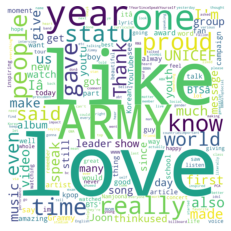

In [47]:
# Generate a word cloud image
wordcloud = WordCloud(collocations=False, stopwords=stop_words_en, background_color="white", height=3000, width=3000).generate(tweets_en)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
wordcloud.to_file("wordcloud_img/speech_EN/fig9.png")

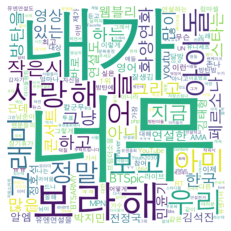

In [10]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["빌보드1위", "진짜", "RM", "랩몬스터", "hankooki", "BTS_twtpic", "pic", "유엔연설", "https", "BTS_twt", "BTS", "twt", "twitter", "방탄의", "방탄이", "유엔에서", "방탄소년단", "방탄", "유엔", "연설", "지민", "뷔", "정국", "남준", "슈가", "idol", "hankooki.com", "sports", "@BTS_twt", "빌보드", "제이홉", "fancake", "연설을", "연설이", "김남준", "방탄은", "star_single", "plugin"])

# Generate a word cloud image
font_path = "/Library/Fonts/AppleGothic.ttf"
wordcloud_kr = WordCloud(font_path = font_path, collocations=False, stopwords=stopwords, background_color="white", height=3000, width=3000).generate(tweets_kr)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
wordcloud_kr.to_file("wordcloud_img/speech_KR/fig10.png")

### 6. Difference of Interpretation and Skepticism as a weapon of Protection

#### Fig. 10a & b - Collocations focused on the declinations of gender related terms in the Korean corpus

In [30]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(content_kr, window_size=10)
kw_filter = lambda *w: '성정체성' not in w
finder.apply_ngram_filter(kw_filter)
finder.nbest(bigram_measures.likelihood_ratio, 15)

[('피부색', '성정체성'),
 ('성정체성', '따윈'),
 ('성정체성', '부숴'),
 ('성정체성', '불쾌하다'),
 ('성정체성', '슨건데'),
 ('성정체성', '어떻든'),
 ('도넛', '성정체성'),
 ('상당하다', '성정체성'),
 ('성찰', '성정체성'),
 ('챔피언', '성정체성'),
 ('성정체성', '스픽'),
 ('성정체성', '요약'),
 ('틀리다', '성정체성'),
 ('성정체성', '비꼬다'),
 ('성차별', '성정체성')]

In [31]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(content_kr, window_size=15)
kw_filter = lambda *w: '성정체성' not in w
finder.apply_ngram_filter(kw_filter)
finder.nbest(bigram_measures.likelihood_ratio, 15)

[('성정체성', '도하'),
 ('피부색', '성정체성'),
 ('pic.twitter.com/0bH8e873El', '성정체성'),
 ('값어치', '성정체성'),
 ('깨끗하다', '성정체성'),
 ('논란중', '성정체성'),
 ('도넛', '성정체성'),
 ('상당하다', '성정체성'),
 ('성정체성', 'ㅡㅡ'),
 ('성정체성', '따윈'),
 ('성정체성', '부숴'),
 ('성정체성', '불쾌하다'),
 ('성정체성', '슨건데'),
 ('성정체성', '어떻든'),
 ('성정체성', '투도')]

#### Bonus - Main collocations of the reactions to the speech

In [16]:
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures

biagram_collocation_kr = BigramCollocationFinder.from_words(content_kr) 
biagram_collocation_kr.nbest(BigramAssocMeasures.likelihood_ratio, 15)

[('칼', '군무'),
 ('브링더', '소울'),
 ('장기', '휴가'),
 ('문화', '훈장'),
 ('참여', '부탁드리다'),
 ('아포', '방포'),
 ('부탁드리다', '#BTSpic'),
 ('명동', '전광판'),
 ('군무', '라이브'),
 ('작다', '화양연화'),
 ('실력', '파'),
 ('전광판', '무료'),
 ('페이크', '럽'),
 ('귀', '움'),
 ('휴가', '브링더')]

In [17]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 

trigram_collocation_kr = TrigramCollocationFinder.from_words(content_kr)  
trigram_collocation_kr.nbest(TrigramAssocMeasures.likelihood_ratio, 15)

[('칼', '군무', '라이브'),
 ('휴가', '브링더', '소울'),
 ('잘생기다', '칼', '군무'),
 ('참여', '부탁드리다', '#BTSpic'),
 ('장기', '휴가', '브링더'),
 ('페르소나', '장기', '휴가'),
 ('브링더', '소울', '아미'),
 ('명동', '전광판', '무료'),
 ('윙즈', '칼', '군무'),
 ('작다', '화양연화', '달방'),
 ('스타', '지금', '투표'),
 ('섹시하다', '칼', '군무'),
 ('칼', '군무', '뮤비'),
 ('군무', '라이브', '실력'),
 ('전광판', '무료', '광고')]